Config

In [ ]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17


In [157]:
!pip3 install graphviz
!pip3 install matplotlib
!pip3 install xarray
!pip3 install seaborn


In [ ]:
!sudo apt-get install unixodbc-dev
!pip install pyodbc
!pip install chart_studio
!pip install atoti
!pip install atoti-jupyterlab


In [1]:
import pyodbc
import pandas as pd
import atoti as tt
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET


Welcome to atoti 0.6.5!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [9]:
tree = ET.parse('C:/Users/vinh2_ri4orrg/Atoti notebook/Schema1.xml')
root = tree.getroot()
for child in root:
    print(child.tag, child.attrib)

Cube {'name': 'Sales OLAP cube', 'visible': 'true', 'cache': 'true', 'enabled': 'true'}
Cube {'name': 'Purchase', 'visible': 'true', 'cache': 'true', 'enabled': 'true'}


Create connection to azure db


In [3]:

server = 'thesis-vinh-minh.database.windows.net'
database = 'WWIDW-thesis'
username = 'thesis'
password = 'Bminhganhteam123'   
driver= '{ODBC Driver 17 for SQL Server}'

conn= pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor =  conn.cursor() 


Get data from azure sql server to dataframe

In [4]:

sql = "SELECT top 1000 * FROM Fact.Sale"
data = pd.read_sql(sql,conn)

c:\users\vinh2_ri4orrg\pycharmprojects\pythonproject1\venv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Execute queries

In [6]:
cursor.execute("SELECT top 10 * FROM Fact.Sale")
row = cursor.fetchone()
i =0
while row and i<=10:
  print (row, '\n')
  row = cursor.fetchone()
  i = i+1


(1, 69644, 0, 0, 153, datetime.date(2013, 1, 1), datetime.date(2013, 1, 2), 15, 1, 'Ride on toy sedan car (Black) 1/12 scale', 'Each', 10, Decimal('230.00'), Decimal('15.000'), Decimal('2300.00'), Decimal('345.00'), Decimal('850.00'), Decimal('2645.00'), 10, 0, 11) 

(2, 47692, 0, 0, 170, datetime.date(2013, 1, 1), datetime.date(2013, 1, 2), 6, 2, 'Developer joke mug - old C developers never die (White)', 'Each', 9, Decimal('13.00'), Decimal('15.000'), Decimal('117.00'), Decimal('17.55'), Decimal('76.50'), Decimal('134.55'), 9, 0, 11) 

(3, 47692, 0, 0, 210, datetime.date(2013, 1, 1), datetime.date(2013, 1, 2), 6, 2, 'USB food flash drive - chocolate bar', 'Each', 9, Decimal('32.00'), Decimal('15.000'), Decimal('288.00'), Decimal('43.20'), Decimal('180.00'), Decimal('331.20'), 9, 0, 11) 

(4, 68504, 105, 1, 106, datetime.date(2013, 1, 1), datetime.date(2013, 1, 2), 4, 3, 'Superhero action jacket (Blue) XXL', 'Each', 3, Decimal('30.00'), Decimal('15.000'), Decimal('90.00'), Decimal('13.

Test atoti framework


In [5]:
session = tt.Session()

In [35]:
data_atoti= session.read_pandas(dataframe=data,table_name='vinh_test')

In [36]:
cube =  session.create_cube(data_atoti  )

In [37]:
cube.hierarchies
m = cube.measures


In [38]:
l = cube.levels
l

Levels()

In [39]:
m

Measures()

In [159]:
query1 = cube.query(m['Profit.SUM'],levels=[l['Package'],l['Description']],mode = "raw")
print(query1)

    Package                                        Description  Profit.SUM
0      Each           Ride on toy sedan car (Black) 1/12 scale      1700.0
1      Each  Developer joke mug - old C developers never di...       561.0
2      Each               USB food flash drive - chocolate bar       720.0
3      Each                 Superhero action jacket (Blue) XXL       112.0
4      Each         Permanent marker black 5mm nib (Black) 5mm       528.0
..      ...                                                ...         ...
211    Each                   Void fill 300 L bag (White) 300L      3900.0
212    Each                  Superhero action jacket (Blue) XL        72.0
213    Each                  DBA joke mug - daaaaaa-ta (Black)       127.5
214    Each     "The Gu" red shirt XML tag t-shirt (White) 5XL      1080.0
215    Each   Black and orange fragile despatch tape 48mmx100m       518.4

[216 rows x 3 columns]


c:\users\vinh2_ri4orrg\pycharmprojects\pythonproject1\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Each'

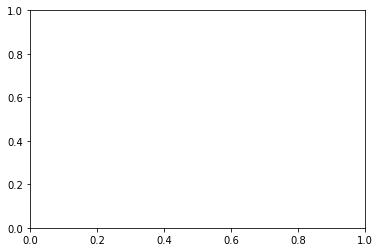

In [163]:
sns.distplot(query1)

In [125]:
session.visualize('query1')

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [126]:
session.link()

Open the notebook in JupyterLab with the atoti extension enabled to see this link.